# GRIP - The Sparks Foundation

# Data Science and Business Analytics

# Name - Nalini Meenakshi

# Task 2: Prediction using Unsupervised ML

<br>

## Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import KMeans

## Loading the dataset

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Exploratory Data Analysis

In [3]:
data.shape

(150, 4)

**Inference:** The dataset contains 150 rows and 4 columns in it.

In [4]:
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

**Inference:** All the variables in the dataset has appropriate data types assigned to it. Hence, there is no need to data type conversion. Also, all the varaible has same datatype which is 'float64'.

In [5]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

**Inference:** The dataset does not contain any null/missing values in it.

In [6]:
data.duplicated().sum()

1

**Inference:** The dataset contains 1 duplicated data in it. Hence, we can drop it using drop_duplicates function.

In [7]:
df = data.drop_duplicates(keep='first')
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [8]:
df.duplicated().sum()

0

**Inference:** From the above result, we can infer that, the duplicated value is removed from the dataset.

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Inference:** <br>
- The above table contains the information such as count, mean, standard deviation, 25% value, 50% value, 75% value, minimum and maximum value of each variables present in the dataset.<br> 
- Hence, from the table, we can infer that the count of each variable is 149 which indicates that all rows are present in the data and there are no any null/missing values present in the data. 

### Outlier Detection

<AxesSubplot:>

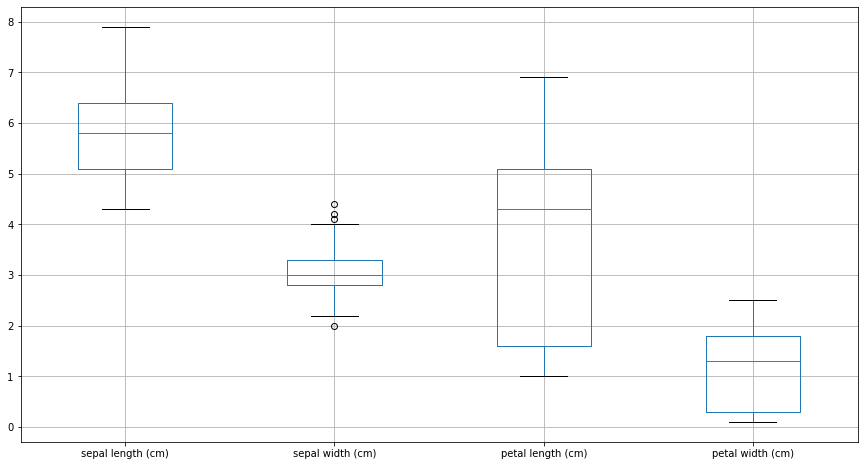

In [10]:
plt.figure(figsize = (15,8))
df.boxplot()

**Inference:** From the above plot, we can infer that, there are small amount of outliers present in the variable sepal width. Since, this amount of oultier does not make any change to our dataset. We do not need any outlier treatment.

## Predicting optimal number of clusters

In [11]:
x = df.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(2, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

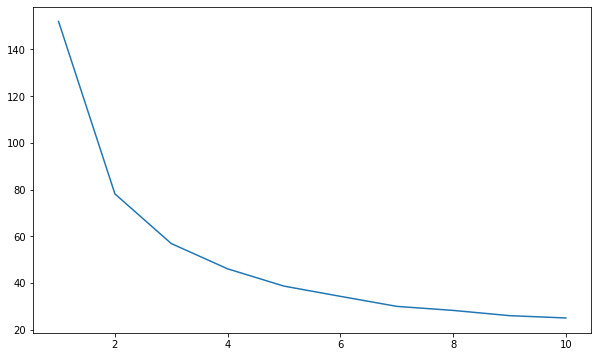

In [19]:
plt.figure(figsize = (10,6))
ks = [1, 2, 3, 4, 5 , 6 , 7 , 8, 9, 10]
plt.plot(ks, wcss)

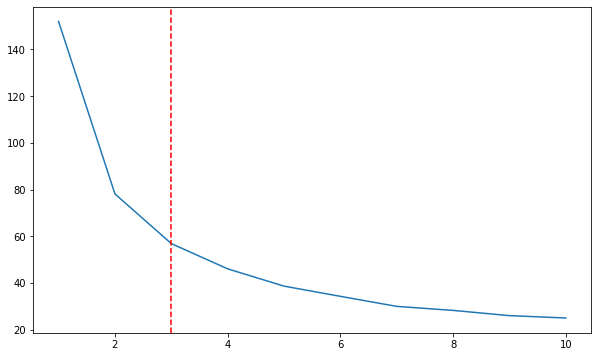

In [20]:
plt.figure(figsize = (10,6))
ks = [1, 2, 3, 4, 5 , 6 , 7 , 8, 9, 10]
plt.plot(ks, wcss)
plt.axvline(3, linestyle='--', color='r')

**Inference:** From the above plot, we can see that, the optimal number of cluster is K = 3.

### Visual representation of clusters

In [14]:
# Applying kmeans to the dataset / Creating the kmeans classifier

x = df.iloc[:, [0, 1, 2, 3]].values

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

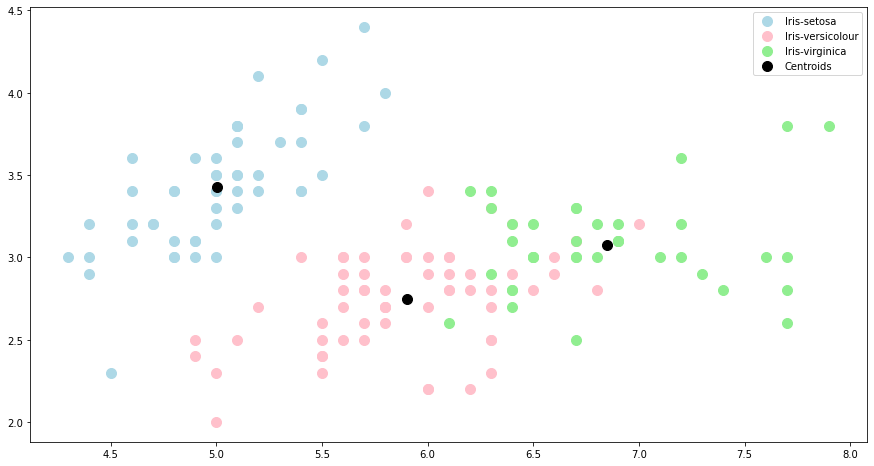

In [15]:
# Visualising the clusters - On the first two columns

plt.figure(figsize = (15,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'lightblue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'pink', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'lightgreen', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()